## importing relevant libraries


In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

## reading data from url


In [2]:
#reading data from url
url="http://bit.ly/w-data"
df=pd.read_csv(url)


In [3]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
df.shape

(25, 2)

In [5]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


## plotting a graph


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

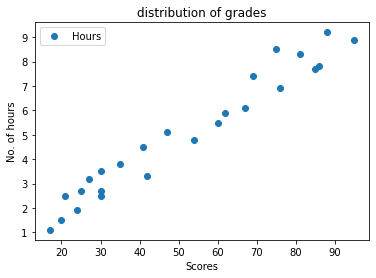

In [6]:
df.plot(x='Scores',y='Hours',style='o')
plt.xlabel('Scores')
plt.ylabel('No. of hours')
plt.title('distribution of grades')
plt.plot

In [7]:
#checking missing or null values
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

## dividing the dependant and independant variables


In [8]:
x = df.iloc[:, :-1].values
y = df.iloc[:,1].values

In [9]:
x.reshape(1, -1)

array([[2.5, 5.1, 3.2, 8.5, 3.5, 1.5, 9.2, 5.5, 8.3, 2.7, 7.7, 5.9, 4.5,
        3.3, 1.1, 8.9, 2.5, 1.9, 6.1, 7.4, 2.7, 4.8, 3.8, 6.9, 7.8]])

In [10]:
#performing linear regression
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,shuffle=True, random_state=0)


## linear regression

In [11]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [12]:
y_pred = regressor.predict(x_test)


## Visualize training set results


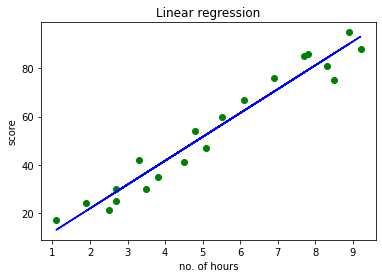

In [13]:
import matplotlib.pyplot as plt
# plot the actual data points of training set
plt.scatter(x_train, y_train, color = 'green')
# plot the regression line
plt.plot(x_train, regressor.predict(x_train), color='blue')
plt.xlabel('no. of hours')
plt.ylabel('score')
plt.title('Linear regression')
plt.show()

## Visualize test set results


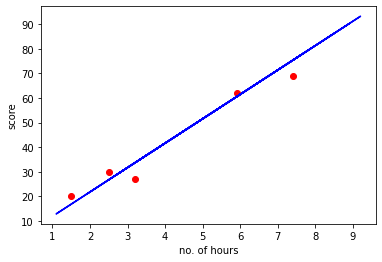

In [14]:
import matplotlib.pyplot as plt
# plot the actual data points of test set
plt.scatter(x_test, y_test, color = 'red')
# plot the regression line (same as above)
plt.plot(x_train, regressor.predict(x_train), color='blue')
plt.xlabel('no. of hours')
plt.ylabel('score')
plt.show()

## Comparing Actual vs Predicted values


In [15]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [16]:
from sklearn import metrics

In [17]:
from sklearn.metrics import mean_absolute_error, mean_squared_error  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred))
rmse= np.sqrt(mean_squared_error(y_pred,y_test))
print('root mean squared error is', rmse)

Mean Absolute Error: 4.183859899002975
root mean squared error is 4.6474476121003665


In [18]:
print('Training Accuracy:',(regressor.score(x_train, y_train)))
print('test Accuracy',(regressor.score(x_test, y_test)))

Training Accuracy: 0.9515510725211552
test Accuracy 0.9454906892105356


In [19]:
print('Training Accuracy:',(100*regressor.score(x_train, y_train)).round(2),'%')
print('test Accuracy',(100*regressor.score(x_test, y_test)).round(2),'%')

Training Accuracy: 95.16 %
test Accuracy 94.55 %


## Lasso regression

In [20]:
from sklearn.linear_model import Lasso

In [21]:
lasso = Lasso(alpha=1,random_state = 0)
#Fitting the Training data to the Lasso regressor
lasso.fit(x_train,y_train)

Lasso(alpha=1, random_state=0)

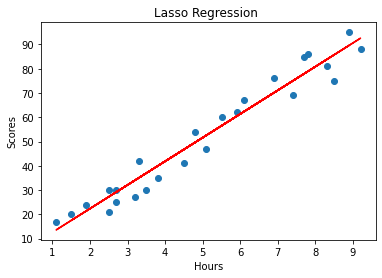

In [22]:
plt.scatter(x, y)
plt.plot(x, lasso.predict(x), c='red')
plt.ylabel("Scores")
plt.xlabel("Hours")
plt.title("Lasso Regression ")
plt.show()

##  validation set predictions VS actual values


In [23]:
las_Pred= lasso.predict(x_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted':las_Pred})  
df

,Actual,Predicted
0,20,17.489479
1,27,34.062443
2,69,75.007413
3,30,27.238282
4,62,60.384210


In [24]:
from sklearn.metrics import mean_absolute_error, mean_squared_error  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, las_Pred))
rmse= np.sqrt(mean_squared_error(las_Pred,y_test))
print('root mean squared error is', rmse)

Mean Absolute Error: 3.9915771073417075
root mean squared error is 4.527862541889942


In [25]:
print('Training Accuracy:',(100*lasso.score(x_train, y_train)).round(2),'%')
print('test Accuracy',(100*lasso.score(x_test, y_test)).round(2),'%')

Training Accuracy: 95.13 %
test Accuracy 94.83 %


## ridge regression

In [26]:
from sklearn.linear_model import Ridge


In [27]:
# while training,larger the value of alpha,stronger the regularization
r = Ridge(alpha=1,random_state=0 )
r.fit(x_train, y_train)

Ridge(alpha=1, random_state=0)

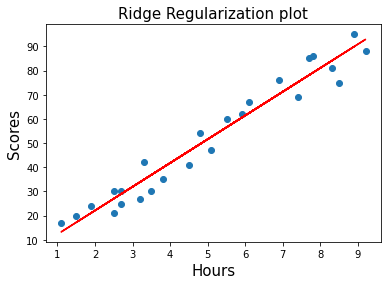

In [28]:
#Visualizing how well the model fits the data

plt.scatter(x, y)
plt.plot(x, r.predict(x), c='red')
plt.ylabel("Scores",fontsize=15)
plt.xlabel("Hours",fontsize=15)
plt.title("Ridge Regularization plot",fontsize=15)
plt.show()

##  validation set predictions VS actual values


In [30]:
rPred = r.predict(x_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': rPred})  
df

,Actual,Predicted
0,20,17.181700
1,27,33.894564
2,69,75.185168
3,30,27.012796
4,62,60.438524


In [31]:

print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, rPred))
rmse= np.sqrt(mean_squared_error(rPred,y_test))
print('root mean squared error is', rmse)

Mean Absolute Error: 4.089342367221116
root mean squared error is 4.584664003749623


In [33]:
print('Training Accuracy:',(100*r.score(x_train, y_train)).round(2),'%')
print('test Accuracy',(100*r.score(x_test, y_test)).round(2),'%')

Training Accuracy: 95.15 %
test Accuracy 94.7 %


## elastic net regression

In [34]:
from sklearn.linear_model import ElasticNet

In [35]:
# Train the model 
enet = ElasticNet(alpha = 1) 
enet.fit(x_train, y_train) 

ElasticNet(alpha=1)

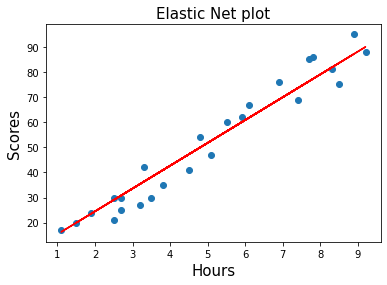

In [36]:
#Visualizing how well the model fits the data¶

plt.scatter(x, y)
plt.plot(x, enet.predict(x), c='red')
plt.ylabel("Scores",fontsize=15)
plt.xlabel("Hours",fontsize=15)
plt.title("Elastic Net plot",fontsize=15)
plt.show()

##  validation set predictions VS actual values


In [37]:
enetPred = enet.predict(x_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted':enetPred})  
df

,Actual,Predicted
0,20,19.939207
1,27,35.398658
2,69,73.592597
3,30,29.033002
4,62,59.951905


In [38]:

print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, enetPred))
rmse= np.sqrt(mean_squared_error(enetPred,y_test))
print('root mean squared error is', rmse)

Mean Absolute Error: 3.2134283660757093
root mean squared error is 4.399156405418881


In [39]:
print('Training Accuracy:',(100*enet.score(x_train, y_train)).round(2),'%')
print('test Accuracy',(100*enet.score(x_test, y_test)).round(2),'%')

Training Accuracy: 94.51 %
test Accuracy 95.12 %


## comparing performances of all models

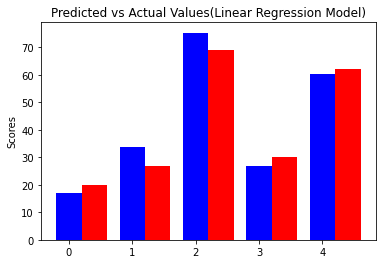

In [41]:
N=np.arange(5)
plt.bar(N+0.4,y_test,width=0.4,label='Actual',color='red')
plt.bar(N,y_pred,width=0.4,label='Linear Regression',color='blue')
plt.ylabel('Scores')
plt.title('Predicted vs Actual Values(Linear Regression Model)')
plt.show()

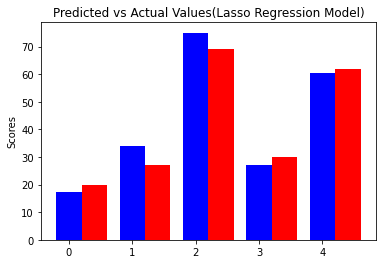

In [42]:
plt.bar(N+0.4,y_test,width=0.4,label='Actual',color='red')
plt.bar(N,las_Pred,width=0.4,label='Lasso Regression',color='blue')
plt.ylabel('Scores')
plt.title('Predicted vs Actual Values(Lasso Regression Model)')
plt.show()

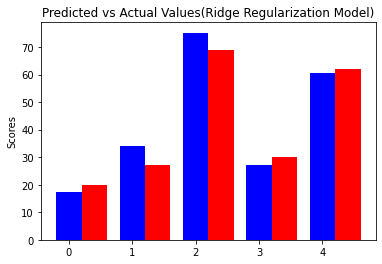

In [43]:
plt.bar(N+0.4,y_test,width=0.4,label='Actual',color='red')
plt.bar(N,rPred,width=0.4,label='Ridge Regularization',color='blue')
plt.ylabel('Scores')
plt.title('Predicted vs Actual Values(Ridge Regularization Model)')
plt.show()

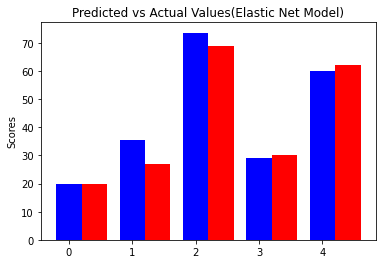

In [44]:
plt.bar(N+0.4,y_test,width=0.4,label='Actual',color='red')
plt.bar(N,enetPred,width=0.4,label='Elastic Net',color='blue')
plt.ylabel('Scores')
plt.title('Predicted vs Actual Values(Elastic Net Model)')
plt.show()

## among all the models , the enet model has the least error so we choose this  model

### testing enet with own data
### no. of hours =7

In [46]:
hours = 7
own_pred = enet.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0].round(2)))

No of Hours = 7
Predicted Score = 69.96
